# Dataset

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
def show(img):
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.show()

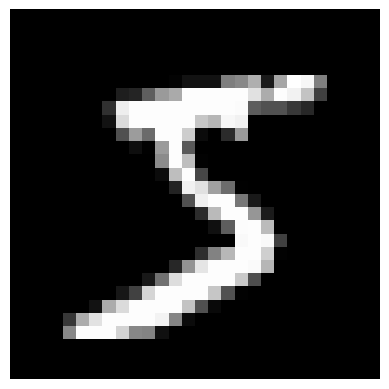

In [5]:
show(X_train[0])

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

# Model

In [11]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input

In [15]:
input_layer = Input(shape = (28, 28, 1))

# encoder
x = Conv2D(16, 3, activation = 'relu', padding = 'same')(input_layer)
x = MaxPool2D(padding='same')(x)

x = Conv2D(8, 3, activation = 'relu', padding = 'same')(x)
x = MaxPool2D(padding='same')(x)

x = Conv2D(8, 3, activation = 'relu', padding = 'same')(x)
encoded = MaxPool2D(padding='same')(x)

In [16]:
# decoder
x = Conv2D(8, 3, activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D()(x)

x = Conv2D(8, 3, activation = 'relu', padding = 'same')(x)
x = UpSampling2D()(x)

x = Conv2D(16, 3, activation = 'relu')(x)
x = UpSampling2D()(x)

decoded = Conv2D(1, 3, activation = 'relu', padding = 'same')(x)

In [17]:
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 8)           584 

# Training

In [18]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [20]:
history = autoencoder.fit(X_train, X_train, epochs=33, batch_size = 128, validation_data=(X_test, X_test))

Epoch 1/33
469/469 [==============================] - 13s 8ms/step - loss: 0.2237 - val_loss: 0.1982
Epoch 2/33
469/469 [==============================] - 3s 7ms/step - loss: 0.1959 - val_loss: 0.1847
Epoch 3/33
469/469 [==============================] - 3s 6ms/step - loss: 0.2155 - val_loss: 0.1997
Epoch 4/33
469/469 [==============================] - 3s 6ms/step - loss: 0.2105 - val_loss: 0.2083
Epoch 5/33
469/469 [==============================] - 4s 8ms/step - loss: 0.1941 - val_loss: 0.1866
Epoch 6/33
469/469 [==============================] - 4s 8ms/step - loss: 0.2055 - val_loss: 0.1994
Epoch 7/33
469/469 [==============================] - 5s 11ms/step - loss: 0.1832 - val_loss: 0.1728
Epoch 8/33
469/469 [==============================] - 4s 9ms/step - loss: 0.1880 - val_loss: 0.1716
Epoch 9/33
469/469 [==============================] - 5s 10ms/step - loss: 0.1733 - val_loss: 0.1676
Epoch 10/33
469/469 [==============================] - 3s 7ms/step - loss: 0.1948 - val_loss: 0.2

# Prediction

In [21]:
encoder = Model(input_layer, encoded)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 8)           584 

In [22]:
decoder_input = Input(shape = (4,4,8))

decoder = autoencoder.layers[7](decoder_input)
for layer in autoencoder.layers[8:]:
    decoder = layer(decoder)

decoder = Model(decoder_input, decoder)
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_7 (UpSamplin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 16)        1168

In [23]:
encoded_images = encoder.predict(X_test)
encoded_images.shape


313/313 [==============================] - 1s 2ms/step


(10000, 4, 4, 8)

In [25]:
decoded_images = decoder.predict(encoded_images)
decoded_images.shape

313/313 [==============================] - 1s 3ms/step


(10000, 28, 28, 1)

In [26]:
decoded_images = decoded_images.reshape(decoded_images.shape[0], 28, 28)
decoded_images.shape

(10000, 28, 28)

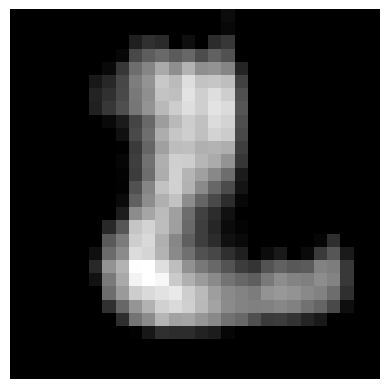

In [27]:
show(decoded_images[1])